<a href="https://colab.research.google.com/github/jhchang/DFDC/blob/main/PlottingResults.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
results = !ls drive/MyDrive/cs274/resultsL1Unstructured/05-17*

results

['drive/MyDrive/cs274/resultsL1Unstructured/05-17-2021_08:02:15-0-100images.csv',
 'drive/MyDrive/cs274/resultsL1Unstructured/05-17-2021_09:49:05-100-200images.csv',
 'drive/MyDrive/cs274/resultsL1Unstructured/05-17-2021_15:56:51-200-300images.csv',
 'drive/MyDrive/cs274/resultsL1Unstructured/05-17-2021_18:18:09-300-400images.csv']

In [3]:
import pandas as pd

df = pd.concat([pd.read_csv(p) for p in results])

df = df.iloc[:,1:]
df['accuracy'] *= 100
df['percentage_of_size_saved'] *= 100
df['percentage_pruned'] *= 100
df['percentage_pruned'] = df['percentage_pruned'].astype(int)
df.rename(columns={'num_params':'num_modules'}, inplace=True)
df.reset_index(drop=True, inplace=True)
df

,pruning_type,num_modules,percentage_pruned,accuracy,runtime,num_videos,num_similar_params,total_possible_selected_paramters,new_model_size_mb,percentage_of_size_saved,efficientnet._conv_stem_weight,efficientnet._bn0_bias,efficientnet._bn0_weight,efficientnet._blocks.0._depthwise_conv_weight,efficientnet._blocks.0._bn1_weight,efficientnet._blocks.0._bn1_bias,efficientnet._blocks.0._se_reduce_bias,efficientnet._blocks.0._se_reduce_weight,efficientnet._blocks.0._se_expand_weight,efficientnet._blocks.0._se_expand_bias,efficientnet._blocks.0._project_conv_weight,efficientnet._blocks.0._bn2_bias,efficientnet._blocks.0._bn2_weight,efficientnet._blocks.1._depthwise_conv_weight,efficientnet._blocks.1._bn1_weight,efficientnet._blocks.1._bn1_bias,efficientnet._blocks.1._se_reduce_bias,efficientnet._blocks.1._se_reduce_weight,efficientnet._blocks.1._se_expand_weight,efficientnet._blocks.1._se_expand_bias,efficientnet._blocks.1._project_conv_weight,efficientnet._blocks.1._bn2_weight,efficientnet._blocks.1._bn2_bias,efficientnet._blocks.2._expand_conv_weight,efficientnet._blocks.2._bn0_weight,efficientnet._blocks.2._bn0_bias,efficientnet._blocks.2._depthwise_conv_weight,efficientnet._blocks.2._bn1_weight,efficientnet._blocks.2._bn1_bias,efficientnet._blocks.2._se_reduce_bias,...,efficientnet._blocks.29._se_reduce_bias,efficientnet._blocks.29._se_reduce_weight,efficientnet._blocks.29._se_expand_weight,efficientnet._blocks.29._se_expand_bias,efficientnet._blocks.29._project_conv_weight,efficientnet._blocks.29._bn2_weight,efficientnet._blocks.29._bn2_bias,efficientnet._blocks.30._expand_conv_weight,efficientnet._blocks.30._bn0_weight,efficientnet._blocks.30._bn0_bias,efficientnet._blocks.30._depthwise_conv_weight,efficientnet._blocks.30._bn1_bias,efficientnet._blocks.30._bn1_weight,efficientnet._blocks.30._se_reduce_bias,efficientnet._blocks.30._se_reduce_weight,efficientnet._blocks.30._se_expand_bias,efficientnet._blocks.30._se_expand_weight,efficientnet._blocks.30._project_conv_weight,efficientnet._blocks.30._bn2_bias,efficientnet._blocks.30._bn2_weight,efficientnet._blocks.31._expand_conv_weight,efficientnet._blocks.31._bn0_bias,efficientnet._blocks.31._bn0_weight,efficientnet._blocks.31._depthwise_conv_weight,efficientnet._blocks.31._bn1_weight,efficientnet._blocks.31._bn1_bias,efficientnet._blocks.31._se_reduce_weight,efficientnet._blocks.31._se_reduce_bias,efficientnet._blocks.31._se_expand_bias,efficientnet._blocks.31._se_expand_weight,efficientnet._blocks.31._project_conv_weight,efficientnet._blocks.31._bn2_weight,efficientnet._blocks.31._bn2_bias,efficientnet._conv_head_weight,efficientnet._bn1_bias,efficientnet._bn1_weight,efficientnet.attconv_bias,efficientnet.attconv_weight,classifier_bias,classifier_weight
0,global_L1unstructured,0,0,90.000000,10.333381,100,17550466,0.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,global_L1unstructured,420,80,20.000000,10.513516,100,3510105,17550466.0,121.370408,79.999933,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,global_L1unstructured,420,70,20.000000,10.516868,100,5265152,17550466.0,182.055422,69.999930,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,global_L1unstructured,420,60,20.000000,10.513238,100,7020198,17550466.0,242.740401,59.999934,1.0,1.0,1.0,1.0,1.0,1.0,1.0

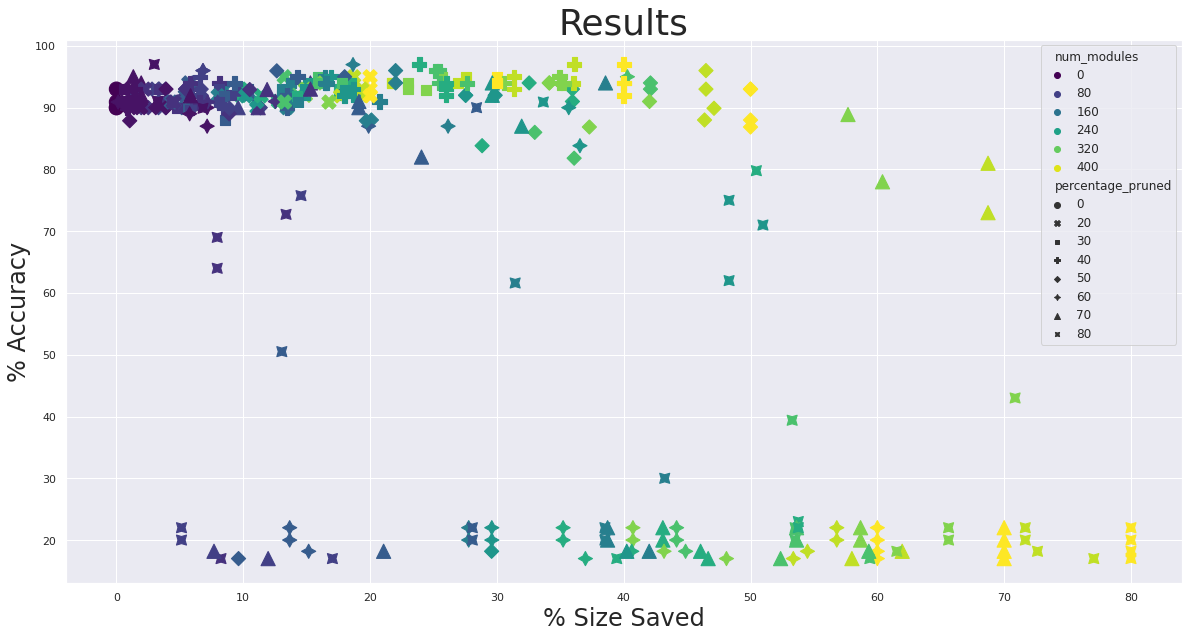

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

fig, ax = plt.subplots(1, figsize=(20,10))
sns.scatterplot(data=df, x='percentage_of_size_saved', y='accuracy', ax=ax, s=200, hue='num_modules', style='percentage_pruned', palette='viridis', edgecolor=None)

ax.set_title('Results', fontsize=36)
ax.set_xlabel('% Size Saved', fontsize=24)
ax.set_ylabel('% Accuracy', fontsize=24)
plt.show()

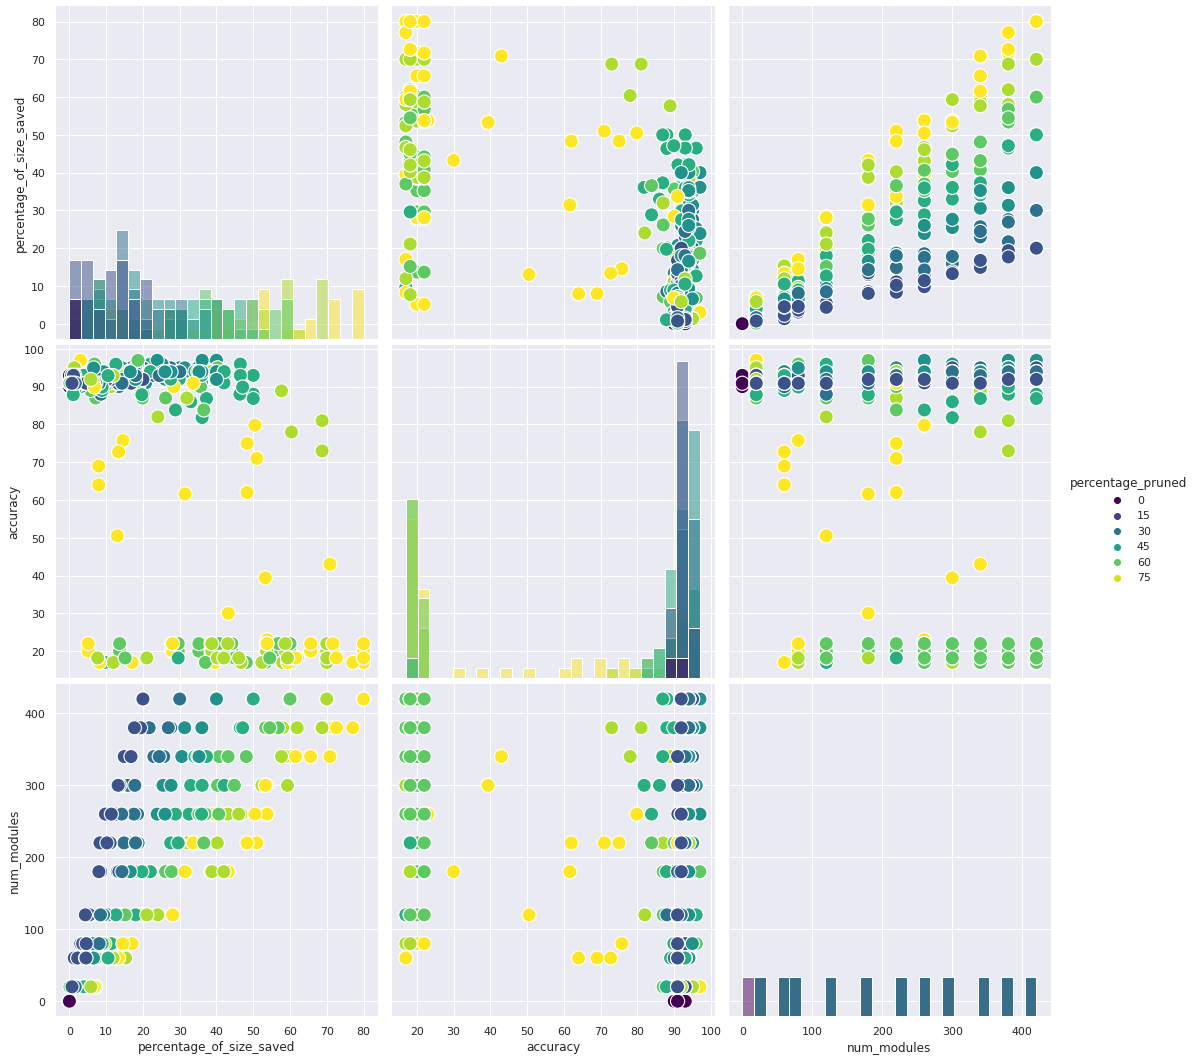

In [5]:
# fig, ax = plt.subplots(1, figsize=(10,10))
pairplot_df = df[['percentage_of_size_saved', 'accuracy', 'percentage_pruned', 'num_modules']]
sns.pairplot(hue="percentage_pruned", data=pairplot_df, palette='viridis', height=5, plot_kws={'s':200}, diag_kind="hist", diag_kws={"bins":25})

plt.show()

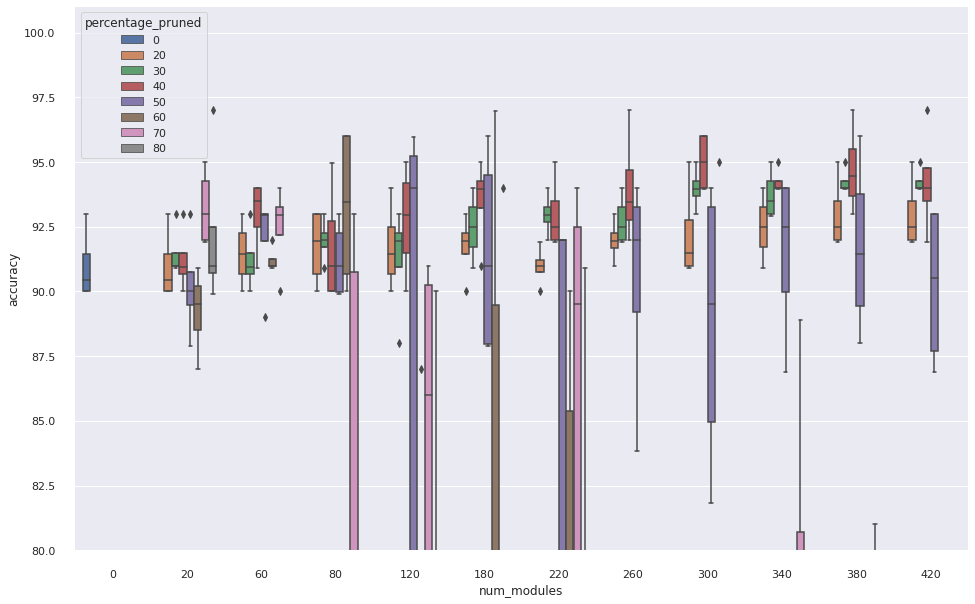

In [6]:
fig, ax = plt.subplots(1, figsize=(16,10))
sns.boxplot(x="num_modules", y="accuracy",
            hue="percentage_pruned", 
            # palette=["m", "g"],
            data=df,
            ax=ax
            )

ax.set_ylim(bottom=80)
sns.despine(offset=10, trim=True)

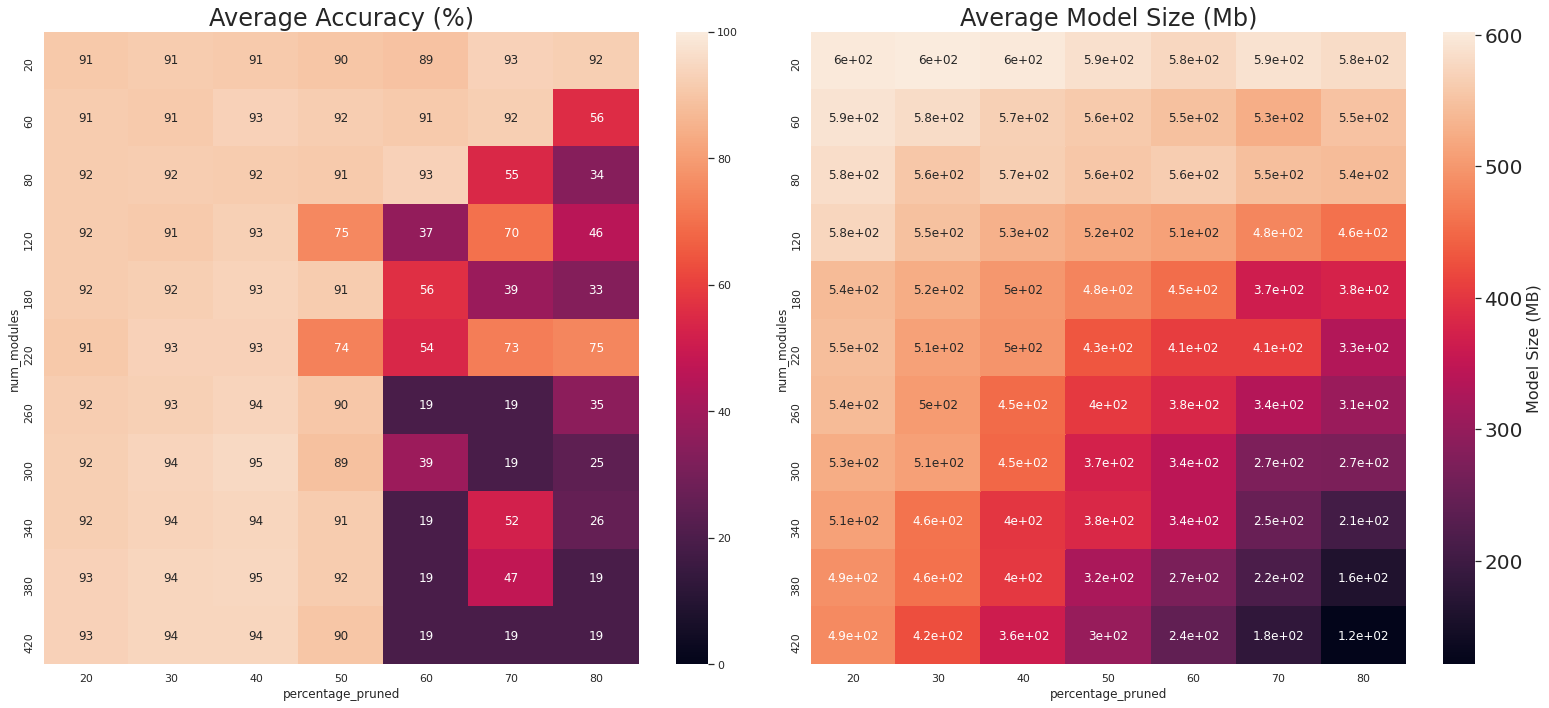

In [7]:
mean_df = df[df['percentage_pruned']>0].groupby(by=['num_modules','percentage_pruned'])[['accuracy','new_model_size_mb']].mean().fillna(0)


fig, ax = plt.subplots(1,2, figsize=(22,10))

p = sns.heatmap(mean_df['accuracy'].reset_index().pivot(index='num_modules', columns='percentage_pruned', values='accuracy'), ax=ax[0],annot=True,vmin=0, vmax=100)

p = sns.heatmap(mean_df['new_model_size_mb'].reset_index().pivot(index='num_modules', columns='percentage_pruned', values='new_model_size_mb'), ax=ax[1], annot=True)

ax[0].set_title('Average Accuracy (%)', fontsize=24)
ax[1].set_title('Average Model Size (Mb)', fontsize=24)

cbar = ax[1].collections[0].colorbar
cbar.ax.tick_params(labelsize=20)
cbar.ax.set_ylabel('Model Size (MB)',fontsize=16)
plt.tight_layout()
plt.show()

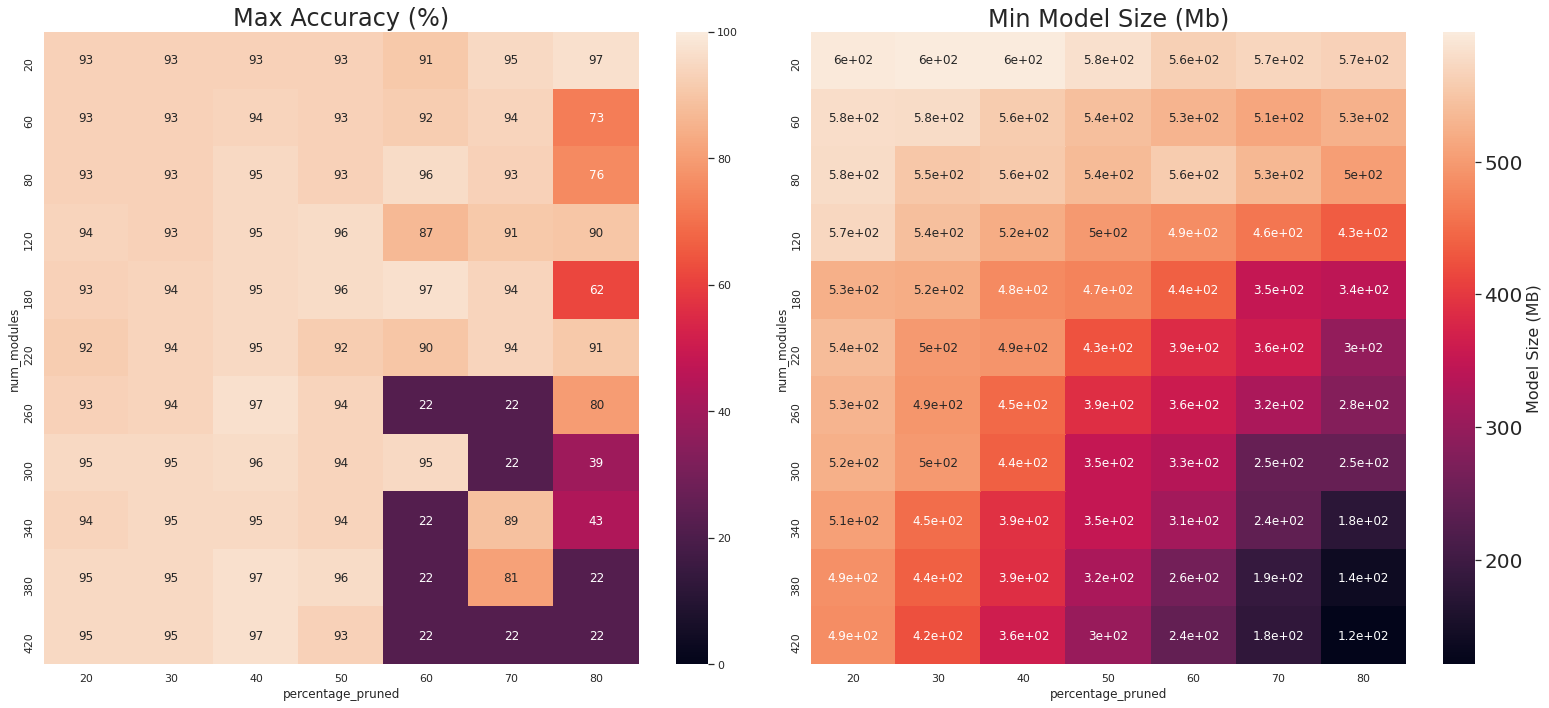

In [8]:
max_df = df[df['percentage_pruned']>0].groupby(by=['num_modules','percentage_pruned'])[['accuracy','new_model_size_mb']].agg({'accuracy':max, 'new_model_size_mb':min}).fillna(0)

fig, ax = plt.subplots(1,2, figsize=(22,10))

p = sns.heatmap(max_df['accuracy'].reset_index().pivot(index='num_modules', columns='percentage_pruned', values='accuracy'), ax=ax[0],annot=True,vmin=0, vmax=100)

p = sns.heatmap(max_df['new_model_size_mb'].reset_index().pivot(index='num_modules', columns='percentage_pruned', values='new_model_size_mb'), ax=ax[1], annot=True)

ax[0].set_title('Max Accuracy (%)', fontsize=24)
ax[1].set_title('Min Model Size (Mb)', fontsize=24)

cbar = ax[1].collections[0].colorbar
cbar.ax.tick_params(labelsize=20)
cbar.ax.set_ylabel('Model Size (MB)',fontsize=16)
plt.tight_layout()
plt.show()

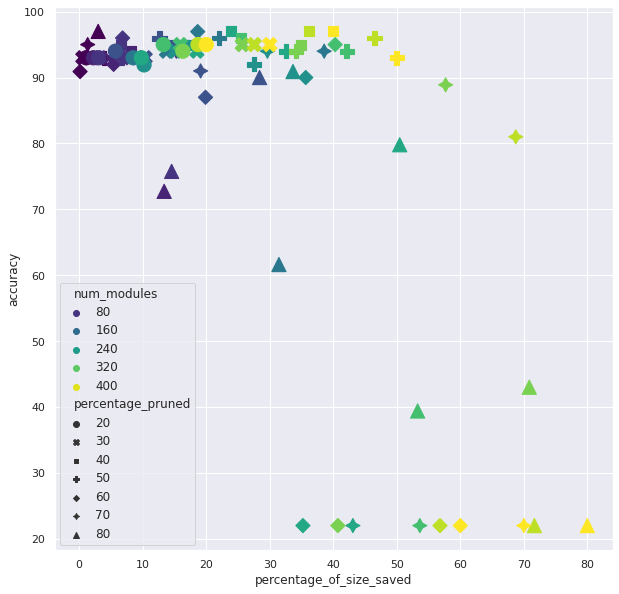

In [9]:
import numpy as np

fig, ax = plt.subplots(1, figsize=(10,10))

index_of_max_accuracy = df[df['percentage_pruned']>0].groupby(by=['num_modules','percentage_pruned'])['accuracy'].apply(lambda x: x.index[np.argmax(x)]).values

sns.scatterplot(data=df.loc[index_of_max_accuracy], x='percentage_of_size_saved', y='accuracy', ax=ax, s=200, hue='num_modules', style='percentage_pruned', palette='viridis', edgecolor=None)



plt.show()

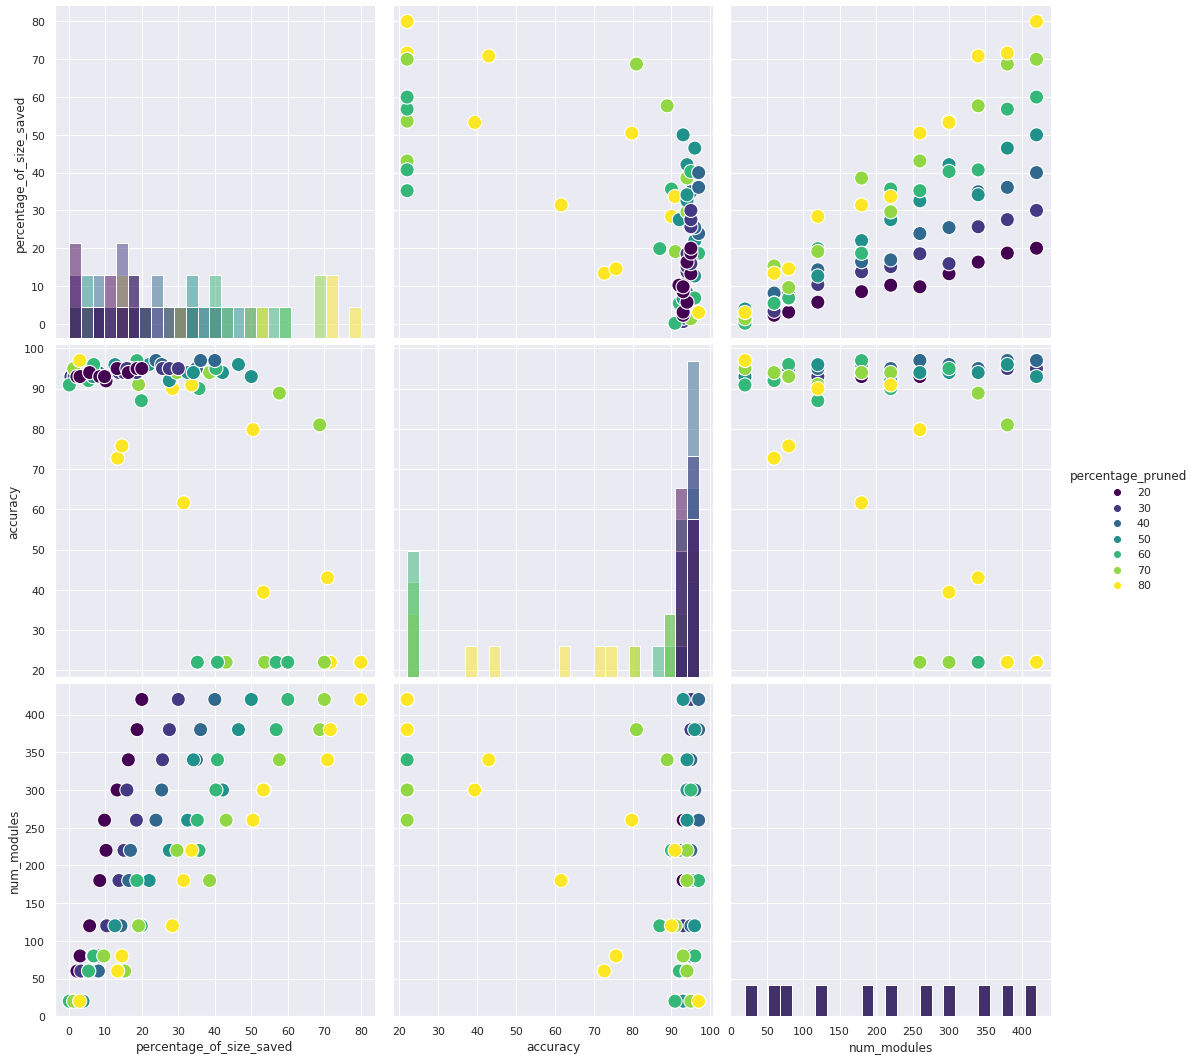

In [10]:
pairplot_df = df.loc[index_of_max_accuracy][['percentage_of_size_saved', 'accuracy', 'percentage_pruned', 'num_modules']]
sns.pairplot(hue="percentage_pruned", data=pairplot_df, palette='viridis', height=5, plot_kws={'s':200}, diag_kind="hist", diag_kws={"bins":25})


In [11]:
df.loc[index_of_max_accuracy].shape, df.shape

((77, 430), (312, 430))